In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/syaffath/DataScience/main/Cell_Samples/cell_samples.csv'
df_cell = pd.read_csv(url)
df_cell

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
df_cell['Class'] = df_cell['Class'].replace(2,0)
df_cell.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [4]:
df_cell['Class'] = df_cell['Class'].replace(4,1)
df_cell.sample(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
407,1234554,1,1,1,1,2,1,2,1,1,0
560,1321942,5,1,1,1,2,1,3,1,1,0
371,493452,1,1,3,1,2,1,1,1,1,0
468,1105524,4,1,1,1,2,1,1,1,1,0
586,1254538,8,10,10,10,6,10,10,10,1,1


In [5]:
df_cell.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [6]:
#Data cleaning
df_cell = df_cell[pd.to_numeric(df_cell['BareNuc'], errors='coerce').notnull()]
df_cell['BareNuc'] = df_cell["BareNuc"].astype('int64')
df_cell.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

<function matplotlib.pyplot.show>

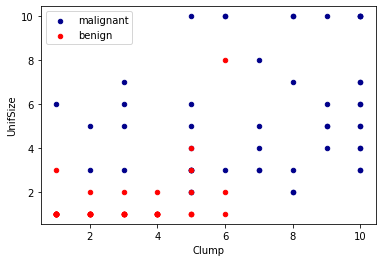

In [7]:
#Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

ax = df_cell[df_cell['Class']==1][0:50].plot(kind="scatter", x="Clump", y="UnifSize", color="DarkBlue", label="malignant");
df_cell[df_cell['Class']==0][0:50].plot(kind="scatter", x="Clump", y="UnifSize", color="Red", label="benign", ax=ax);
plt.show

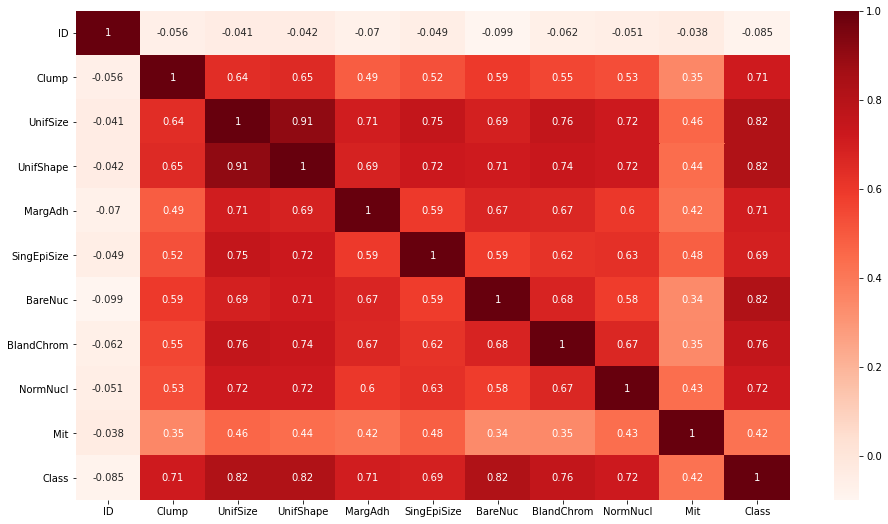

In [8]:
#Visualisasi Data

import seaborn as sns
corr = df_cell.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

# SVM

In [9]:
#Apply Machine learning
from sklearn.model_selection import train_test_split

Features = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl']
x = df_cell[Features]
y = df_cell['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report

sv_clf = SVC(kernel='rbf')
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)

sv_clf_acc

0.9562043795620438

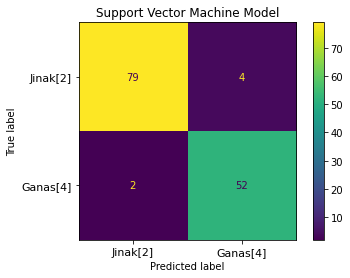

In [11]:
plot_confusion_matrix(sv_clf, x_test, y_test)
plt.title("Support Vector Machine Model")
plt.xticks(range(2), ['Jinak[2]', 'Ganas[4]'], fontsize=11)
plt.yticks(range(2), ['Jinak[2]', 'Ganas[4]'], fontsize=11)
plt.show()

In [12]:
#Hasil prediksi vs Ground truth indeks ke 0 - 5
print("Prediction:   ", sv_clf_pred[0:30], "\nGround Truth: ", np.asarray(y_test[0:30]))

Prediction:    [1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1] 
Ground Truth:  [1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1]


# Deep Learning

In [59]:
#Apply Machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Features = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl']
x = df_cell[Features].values
y = df_cell['Class'].values

In [60]:
MinMaxScaler = preprocessing.MinMaxScaler()
x_scale = MinMaxScaler.fit_transform(x)

In [61]:
x_train, x_test_and_val, y_train, y_test_and_val = train_test_split(x_scale, y, test_size = 0.3)

In [62]:
x_val, x_test, y_val, y_test = train_test_split(x_test_and_val, y_test_and_val, test_size=0.5)

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adamax
from keras.layers import Dropout
from keras import regularizers

In [64]:
model = Sequential([Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(8,)), 
                    Dropout(0.3), 
                    Dense(10, kernel_regularizer=regularizers.l2(0.01), activation='relu'), 
                    Dropout(0.3),
                    Dense(10, kernel_regularizer=regularizers.l2(0.01), activation='relu'), 
                    Dropout(0.3),
                    Dense(1, kernel_regularizer=regularizers.l2(0.01), activation='sigmoid'),])

In [65]:
opt = Adamax(lr=0.00003, decay=1e-6)

In [66]:
model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])

In [67]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=800, validation_data=(x_val, y_val))

Epoch 1/800
15/15 [==============================] - 1s 17ms/step - loss: 0.9921 - accuracy: 0.5182 - val_loss: 1.0109 - val_accuracy: 0.4804
Epoch 2/800
15/15 [==============================] - 0s 5ms/step - loss: 0.9947 - accuracy: 0.4775 - val_loss: 1.0103 - val_accuracy: 0.5000
Epoch 3/800
15/15 [==============================] - 0s 4ms/step - loss: 1.0015 - accuracy: 0.5293 - val_loss: 1.0096 - val_accuracy: 0.5000
Epoch 4/800
15/15 [==============================] - 0s 4ms/step - loss: 1.0047 - accuracy: 0.4974 - val_loss: 1.0089 - val_accuracy: 0.5000
Epoch 5/800
15/15 [==============================] - 0s 6ms/step - loss: 0.9995 - accuracy: 0.5060 - val_loss: 1.0082 - val_accuracy: 0.5196
Epoch 6/800
15/15 [==============================] - 0s 5ms/step - loss: 0.9895 - accuracy: 0.5368 - val_loss: 1.0076 - val_accuracy: 0.5196
Epoch 7/800
15/15 [==============================] - 0s 4ms/step - loss: 0.9904 - accuracy: 0.5178 - val_loss: 1.0070 - val_accuracy: 0.5196
Epoch 8/800


In [68]:
model.evaluate(x_test, y_test)[1]

4/4 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.9903


0.9902912378311157

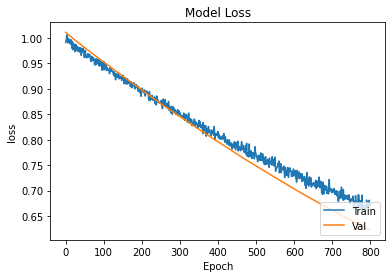

In [69]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

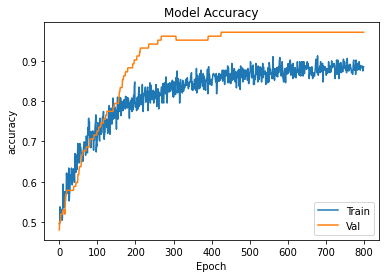

In [70]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()